In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('covid19india.csv')
data

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30.0,1.0,2020.0
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2.0,2.0,2020.0
2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3.0,2.0,2020.0
3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2.0,3.0,2020.0
4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2.0,3.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...
35657,1.0,07/05/2020,NaN,NaN,NaN,Tiruvannamalai,Tamil Nadu,Hospitalized,7.0,5.0,2020.0
35658,1.0,07/05/2020,NaN,NaN,NaN,Tiruvannamalai,Tamil Nadu,Hospitalized,7.0,5.0,2020.0
35659,1.0,07/05/2020,NaN,NaN,NaN,Tiruvannamalai,Tamil Nadu,Hospitalized,7.0,5.0,2020.0
35660,1.0,07/05/2020,NaN,NaN,NaN,Tiruvannamalai,Tamil Nadu,Hospitalized,7.0,5.0,2020.0


In [4]:
day = data[data['Current Status']=='Hospitalized'].groupby(['Month', 'Day'])['Num Cases'].sum()
day

Month  Day 
3.0    4.0        5.0
       5.0        1.0
       7.0        2.0
       9.0        4.0
       10.0       4.0
                ...  
5.0    3.0     2952.0
       4.0     3656.0
       5.0     2971.0
       6.0     3602.0
       7.0      613.0
Name: Num Cases, Length: 63, dtype: float64

In [5]:
x= np.arange(len(day))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62])

In [6]:
y= day.values
y

array([5.000e+00, 1.000e+00, 2.000e+00, 4.000e+00, 4.000e+00, 8.000e+00,
       4.000e+00, 6.000e+00, 1.100e+01, 8.000e+00, 1.200e+01, 1.400e+01,
       2.200e+01, 2.100e+01, 5.200e+01, 6.700e+01, 5.900e+01, 8.200e+01,
       6.300e+01, 7.500e+01, 5.800e+01, 1.400e+02, 1.230e+02, 1.060e+02,
       1.780e+02, 3.060e+02, 4.230e+02, 4.850e+02, 5.560e+02, 5.760e+02,
       6.060e+02, 4.850e+02, 5.700e+02, 5.630e+02, 8.120e+02, 8.700e+02,
       8.530e+02, 7.580e+02, 1.243e+03, 1.031e+03, 8.840e+02, 1.061e+03,
       9.220e+02, 1.370e+03, 1.579e+03, 1.239e+03, 1.537e+03, 1.292e+03,
       1.667e+03, 1.408e+03, 1.835e+03, 1.607e+03, 1.568e+03, 1.902e+03,
       1.705e+03, 1.801e+03, 2.396e+03, 2.564e+03, 2.952e+03, 3.656e+03,
       2.971e+03, 3.602e+03, 6.130e+02])

In [7]:
x = x.reshape(-1,1)

In [8]:
y = y.reshape(-1,1)

In [9]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler() 
Sx = sc_x.fit_transform(x)
Sy = sc_y.fit_transform(y)

In [10]:
from sklearn.svm import SVR
reg = SVR(kernel='rbf')  
reg.fit(Sx,Sy.ravel())

SVR()

In [11]:
reg.score(Sx,Sy)*100

85.2514813093335

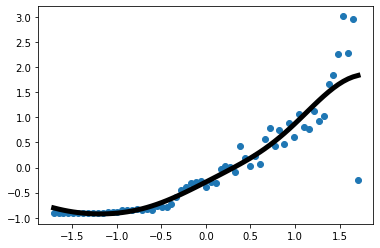

In [12]:
plt.scatter(Sx,Sy)
plt.plot(Sx,reg.predict(Sx),color='k',linewidth=5)
plt.show()